In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import copy
import matplotlib.pyplot as plt
from iaml01cw2_helpers import load_FashionMNIST 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

/Users/thatsmilersmiles/Downloads/ENTER/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [4]:
#normalisation
sys.path.append('/Users/thatsmilersmiles/Desktop/cw2/INFR10069-2020-CW2-main/helpers')
path = '/Users/thatsmilersmiles/Desktop/cw2/INFR10069-2020-CW2-main/data/fashion'
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(path)
Xtrn_orig = copy.deepcopy(Xtrn)
Xtst_orig = copy.deepcopy(Xtst)
Xtrn = Xtrn / 255.0
Xtst = Xtst / 255.0
Xmean = np.mean(Xtrn, axis = 0)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean
Xtrn_nm.shape

(60000, 784)

2.1

In [19]:
#2.1
lm = LogisticRegression()
lm.fit(Xtrn_nm, Ytrn)
Ytst_pred = lm.predict(Xtst_nm)
accuracy = metrics.accuracy_score(Ytst, Ytst_pred)
cm = confusion_matrix(Ytst, Ytst_pred)
print("Accuracy: {0:.2f}%".format(accuracy * 100))
print("Confusion matrix: \n", cm)

Accuracy: 84.01%
Confusion matrix: 
 [[819   3  15  50   7   4  89   1  12   0]
 [  5 953   4  27   5   0   3   1   2   0]
 [ 27   4 731  11 133   0  82   2   9   1]
 [ 31  15  14 866  33   0  37   0   4   0]
 [  0   3 115  38 760   2  72   0  10   0]
 [  2   0   0   1   0 911   0  56  10  20]
 [147   3 128  46 108   0 539   0  28   1]
 [  0   0   0   0   0  32   0 936   1  31]
 [  7   1   6  11   3   7  15   5 945   0]
 [  0   0   0   1   0  15   1  42   0 941]]


2.2

In [21]:
#2.2
lm = SVC(kernel = 'rbf', C = 1.0, gamma = 'auto')
lm.fit(Xtrn_nm, Ytrn)
Ytst_pred = lm.predict(Xtst_nm)
mean_accuracy = metrics.accuracy_score(Ytst, Ytst_pred)
cm = confusion_matrix(Ytst, Ytst_pred)
print("Accuracy: {0:.2f}%".format(mean_accuracy * 100))
print("Confusion matrix: \n", cm)

Accuracy: 84.61%
Confusion matrix: 
 [[845   2   8  51   4   4  72   0  14   0]
 [  4 951   7  31   5   0   1   0   1   0]
 [ 15   2 748  11 137   0  79   0   8   0]
 [ 32   6  12 881  26   0  40   0   3   0]
 [  1   0  98  36 775   0  86   0   4   0]
 [  0   0   0   1   0 914   0  57   2  26]
 [185   1 122  39  95   0 533   0  25   0]
 [  0   0   0   0   0  34   0 925   0  41]
 [  3   1   8   5   2   4  13   4 959   1]
 [  0   0   0   0   0  22   0  47   1 930]]


2.3

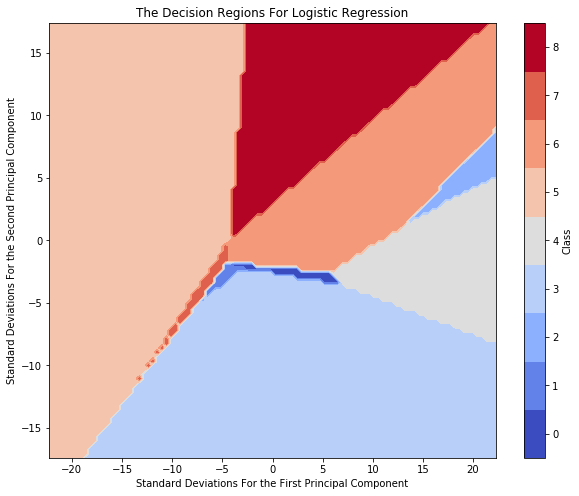

In [26]:
#2.3
pca = PCA(n_components = 2)
pca.fit(Xtrn_nm)
components = pca.fit_transform(Xtrn_nm)
sigma1 = np.std(components[:, 0])
sigma2 = np.std(components[:, 1])
lm = LogisticRegression()
lm.fit(Xtrn_nm, Ytrn)
x = np.linspace(-5 * sigma1, 5 * sigma1, 100)
y = np.linspace(-5 * sigma2, 5 * sigma2, 100)
xv, yv = np.meshgrid(x, y)
l = list()
for i in range(len(xv)):
    for j in range(len(yv)):
        coordinates = [xv[i, j], yv[i, j]]
        l.append(coordinates)      
projected = pca.inverse_transform(l)
zv = lm.predict(projected).reshape(100, 100)
plt.subplots(figsize = (10, 8))
cs = plt.contourf(xv, yv, zv, levels = np.arange(-0.5, 9.5), cmap = plt.cm.get_cmap('coolwarm', 9))
plt.colorbar(cs, ticks = range(9), label = 'Class')
plt.clim(-0.5, 8.5)
plt.xlabel('Standard Deviations For the First Principal Component')
plt.ylabel('Standard Deviations For the Second Principal Component')
plt.title('The Decision Regions For Logistic Regression')
plt.show()

2.4

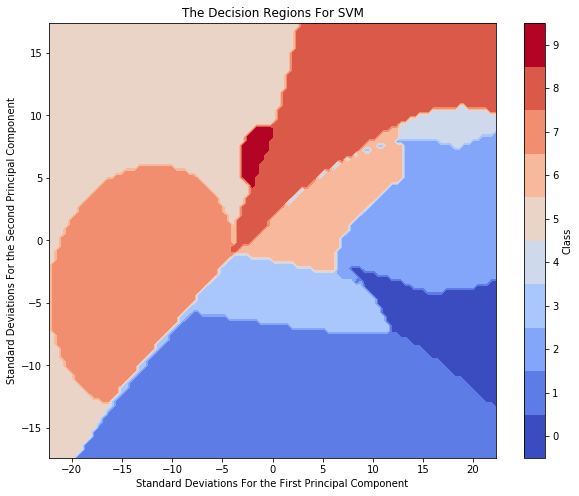

In [5]:
#2.4
pca = PCA(n_components = 2)
pca.fit(Xtrn_nm)
components = pca.fit_transform(Xtrn_nm)
sigma1 = np.std(components[:, 0])
sigma2 = np.std(components[:, 1])
lm = SVC(kernel = 'rbf', C = 1.0, gamma = 'auto')
lm.fit(Xtrn_nm, Ytrn)
x = np.linspace(-5 * sigma1, 5 * sigma1, 100)
y = np.linspace(-5 * sigma2, 5 * sigma2, 100)
xv, yv = np.meshgrid(x, y)
l = list()
for i in range(len(xv)):
    for j in range(len(yv)):
        coordinates = [xv[i, j], yv[i, j]]
        l.append(coordinates)      
projected = pca.inverse_transform(l)
zv = lm.predict(projected).reshape(100, 100)
plt.subplots(figsize = (10, 8))
cs = plt.contourf(xv, yv, zv, levels = np.arange(-0.5, 10.5), cmap = plt.cm.get_cmap('coolwarm', 10))
plt.colorbar(cs, ticks = range(10), label = 'Class')
plt.clim(-0.5, 9.5)
plt.xlabel('Standard Deviations For the First Principal Component')
plt.ylabel('Standard Deviations For the Second Principal Component')
plt.title('The Decision Regions For SVM')
plt.show()

2.5

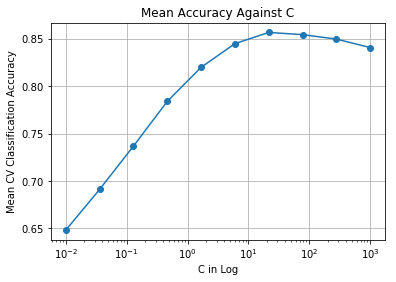

In [5]:
#2.5
Xsmall = np.array([])
for clas in range(10):
    idx = np.where(Ytrn == clas)
    idx1 = idx[0][:1000]
    Xsmall = np.append(Xsmall, Xtrn_nm[idx1])
Xsmall = Xsmall.reshape(10000, 784)
Ysmall = np.array([])
for i in range(10):
    for j in range(1000):
        Ysmall = np.append(Ysmall, i)
Ysmall = Ysmall.reshape(10000,)
Cs = np.logspace(-2, 3, num = 10)
mean_accuracies = []
for c in Cs:
    lm = SVC(kernel = 'rbf', C = c, gamma = 'auto')
    lm.fit(Xsmall, Ysmall)
    mean_accuracies = np.append(mean_accuracies, np.mean(cross_val_score(lm, Xsmall, Ysmall, cv = 3)))
mean_accuracies
plt.plot(Cs, mean_accuracies, 'o-')
plt.title('Mean Accuracy Against C')
plt.xlabel('C in Log')
plt.xscale('log')
plt.ylabel('Mean CV Classification Accuracy')
plt.grid()
plt.show()

2.6

In [6]:
#2.6
Cs = np.logspace(-2, 3, num = 10)
optimalC = Cs[6]
lm = SVC(kernel = 'rbf', C = optimalC, gamma = 'auto')
lm.fit(Xtrn_nm, Ytrn)
Ytrn_pred = lm.predict(Xtrn_nm)
trn_accuracy =  metrics.accuracy_score(Ytrn, Ytrn_pred)
print("Training Accuracy: {0:.2f}%".format(trn_accuracy * 100))
Ytst_pred = lm.predict(Xtst_nm)
tst_accuracy = metrics.accuracy_score(Ytst, Ytst_pred)
print("Tesing Accuracy: {0:.2f}%".format(tst_accuracy * 100))

Training Accuracy: 90.84%
Tesing Accuracy: 87.65%
